In [1]:
#Import required packages
import pandas as pd
import numpy as np
import pickle
import re
import itertools as it


import nltk
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim import corpora, models, similarities, matutils
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import Phrases
from gensim.models.phrases import Phraser

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


#Matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

#Seaborn
import seaborn as sns
sns.set()

#Sklearn
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import median_absolute_error
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier, #For each feature split rule is random, not optimal
                              VotingClassifier, 
                              AdaBoostClassifier, 
                              BaggingRegressor)

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split,
                                     cross_validate)
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

#XGBoost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import os
import pickle


C:\Users\moham\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\moham\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### The following two sections can be left ignored if the text has already been converted to grams. Jump to reload data section. If not, run the section. 

In [2]:
#Open Corpus of News Article Text
# with open('./data/news_df.pickle', 'rb') as file:
# with open('./data/news_data_frame_reduced_preprocessed.pickle', 'rb') as file:
# with open('./data/news_fake_real_df_reduced_token.pickle', 'rb') as file:
#     news_data_frame = pickle.load(file)

### Prepare text grams

In [3]:
# # Convert text and response to array 
# x_text = news_data_frame.text.values
# y_response = news_data_frame.Not_Real_or_Real.values

In [4]:
# # function to recombine nested list of tokens into full articles 
# def lemma_combine(lis):
#     parsed_articles = []
    
#     for i in range(len(lis)):
#         concat_art = ' '.join(lis[i])
#         parsed_articles.append(concat_art)
    
#     return parsed_articles

In [5]:
# # function to match "cleaned" text back up with response variable
# def zip_response(observations, response):
#     response = response.tolist()
    
#     return list(zip(observations, response))

In [6]:
# lem = news_data_frame['tokenized_text']

In [7]:
# # Create bi-grams for our text 
# phrases = Phrases(lem)
# bigram = Phraser(phrases)
# bigram_lem = list(bigram[lem])

In [8]:
# # Create tri-grams for our text
# phrases2 = Phrases(bigram_lem)
# trigram = Phraser(phrases2)
# trigram_lem = list(trigram[bigram_lem])

In [9]:
# # Recombine full article text for unigrams, bigrams, and trigrams
# uni_lem_comb = lemma_combine(lem)
# bi_lem_comb = lemma_combine(bigram_lem)
# tri_lem_comb = lemma_combine(trigram_lem)

In [10]:
# token_uni = "./data/grams/token_unigram_text"
# fileObject = open(token_uni,'wb') 
# pickle.dump(lem,fileObject)   
# fileObject.close()

In [11]:
# token_trigrams = "./data/grams/token_trigram_text"
# fileObject = open(token_trigrams,'wb') 
# pickle.dump(trigram_lem,fileObject)   
# fileObject.close()

In [12]:
# # Save processed text so it can be loaded later 
# unigrams = "./data/grams/unigram_text"
# fileObject = open(unigrams,'wb') 
# pickle.dump(uni_lem_comb,fileObject)   
# fileObject.close()

In [13]:
# bigrams = "./data/grams/bigram_text"
# fileObject = open(bigrams,'wb') 
# pickle.dump(bi_lem_comb,fileObject)   
# fileObject.close()

In [14]:
# trigrams = "./data/grams/trigram_text"
# # open the file for writing
# fileObject = open(trigrams,'wb')
# pickle.dump(tri_lem_comb,fileObject)   
# fileObject.close()

### Reload Processed Text

In [15]:
fileObject = open('./data/grams/unigram_text','rb')  
uni_lem_comb2 = pickle.load(fileObject)

In [16]:
fileObject = open('./data/grams/bigram_text','rb')  
bi_lem_comb2 = pickle.load(fileObject)

In [17]:
fileObject = open('./data/grams/trigram_text','rb')  
tri_lem_comb2 = pickle.load(fileObject)

### Prepare Model

In [18]:
#Open Corpus of News Article Text
with open('./data/news_fake_real_df_reduced.pickle', 'rb') as file:
    news_data_frame = pickle.load(file)

In [19]:
news_data_frame.drop(['label'], axis=1, inplace=True)

In [20]:
# Convert text and response to array 
x_text = news_data_frame.text.values
y_response = news_data_frame.Not_Real_or_Real.values

In [21]:
def evaluate_model(clf, actual, predicted):
    report = metrics.classification_report(actual, predicted, target_names = ["0", "1"])
    matrix = confusion_matrix(actual, predicted)
    train_loss = metrics.log_loss(y_train, clf.predict_proba(x_train))
    test_loss = metrics.log_loss(y_test, clf.predict_proba(x_test))
    
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Confusion Matrix\n", matrix)
    print("Classification Report:\n", report)
    
    return test_loss

In [22]:
# Split test and train data using trigram text
x_train, x_test, y_train, y_test = train_test_split(tri_lem_comb2, y_response, test_size = 0.2, stratify = y_response, random_state=123)

 ### Naive Bayes Model

In [23]:
# Set up pipeline to run TFIDF and Naive Bayes
text_pipe_nb = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [24]:
text_pipe_nb.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
# Use pipeline to predict on train data and find accuracy - no grid search
predicted_train = text_pipe_nb.predict(x_train)
np.mean(predicted_train == y_train)

0.9830508474576272

In [26]:
# Use pipeline to predict on test data and find accuracy - no grid search 
predicted = text_pipe_nb.predict(x_test)
np.mean(predicted == y_test)

0.9255079006772009

In [27]:
# Set up grid search to find best parameters for TFIDF and MNB
parameters = {'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
              'tfidf__min_df': (0.001,0.01,0.1),\
              'nb__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}

In [28]:
# Establish grid search instance
gs_nb = GridSearchCV(text_pipe_nb, parameters, n_jobs=-1, scoring = 'f1')

In [29]:
%%time
# Fit grid search to train data and find best parameters
gs_nb = gs_nb.fit(x_train, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 2min 38s


In [30]:
# Check best parameters
gs_nb.best_params_

{'nb__alpha': 0.001, 'tfidf__max_df': 0.75, 'tfidf__min_df': 0.001}

In [31]:
# Predict on test data
nb_predicted = gs_nb.predict(x_test)

In [32]:
#Save Model
filename = './models/naive_bayes/naive_bayes.sav'
pickle.dump(gs_nb, open(filename, 'wb'))

filename = './models/naive_bayes/ypred_naive_bayes.sav'
pickle.dump(nb_predicted, open(filename, 'wb'))

In [33]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          file_name = None,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.figure(dpi=600)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           ylabel='Actual',
           xlabel='Predicted')
    ax.set_title(title)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=0, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=20)
    fig.tight_layout()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    ax.grid(None)
    #ax.yaxis.set_label_coords(-0.15,0.5)
    #ax.xaxis.set_label_coords(0.5,-0.15)
    fig.savefig('./graphs/'+file_name+'.png', dpi=600)
    return ax

Confusion matrix, without normalization
Naive Bayes Classifcation Report: 
                precision    recall  f1-score   support

           0       0.93      0.94      0.93       463
           1       0.93      0.92      0.93       423

    accuracy                           0.93       886
   macro avg       0.93      0.93      0.93       886
weighted avg       0.93      0.93      0.93       886



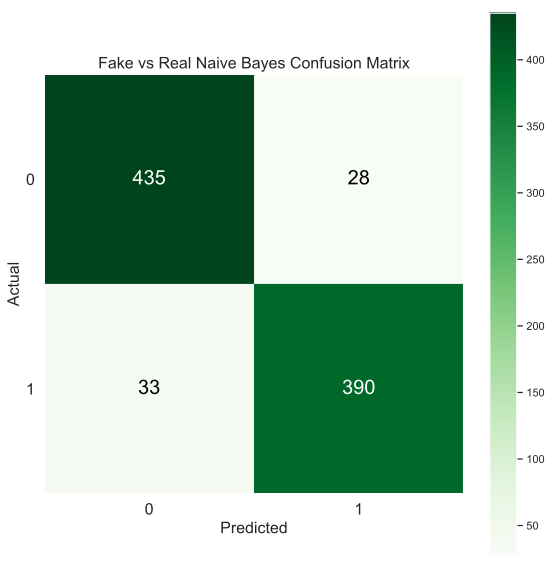

<Figure size 3600x2400 with 0 Axes>

In [34]:
#Print Normalized Confusion Matrix
gs_nb_cm = plot_confusion_matrix(y_test, nb_predicted, file_name='Naive_Bayes_Confusion_Matrix', title='Fake vs Real Naive Bayes Confusion Matrix');
print('Naive Bayes Classifcation Report: \n ', classification_report(y_test,nb_predicted));

Naive Bayes ROC AUC score =  0.9307553268078979


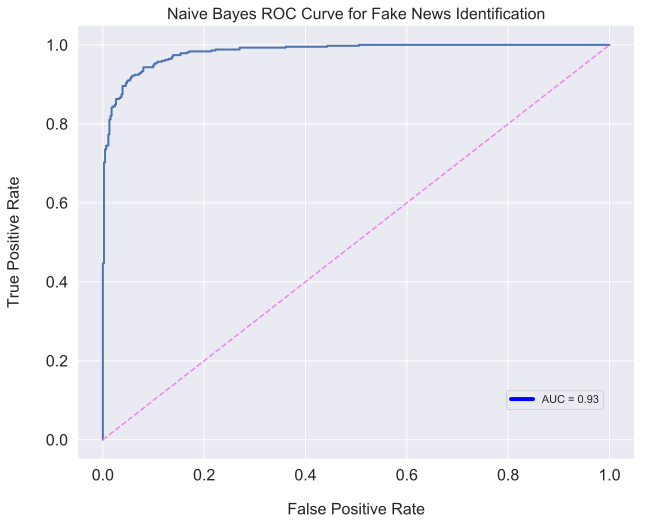

<Figure size 3600x2400 with 0 Axes>

In [35]:
#Generate ROC Curve for Naive Bayes
from matplotlib.lines import Line2D
fpr, tpr, thresholds = roc_curve(y_test, gs_nb.predict_proba(x_test)[:,1])

fig, ax = plt.subplots(figsize=(10, 8))
plt.figure(dpi=600)

ax.plot(fpr, tpr,lw=2)
ax.plot([0,1],[0,1],c='violet',ls='--')
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])

ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('Naive Bayes ROC Curve for Fake News Identification',fontsize=16)
custom_lines = [Line2D([0], [0], color='blue', lw=4)]
ax.legend(custom_lines, ['AUC = {:.2f}'.format(roc_auc_score(y_test,nb_predicted))], loc=(.77,.115))

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5,-0.1)
print(f"\033[1m\033[94mNaive Bayes ROC AUC score = ", roc_auc_score(y_test, nb_predicted))

fig.savefig('./graphs/Naive_Bayes_ROC_Curve.png', dpi=600)

### Logistic Regression Model

In [36]:
text_pipe_lr = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [37]:
text_pipe_lr.fit(x_train,y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [38]:
# Set up grid search to find best parameters for TFIDF and LogReg
lr_parameters = {'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
              'tfidf__min_df': (0.001,0.01,0.1),\
              'lr__penalty': ('l1','l2'),\
                'lr__C': (0.01, 0.1, 1),\
                'lr__class_weight': (None, 'balanced')}

In [39]:
# Establish grid search instance for log reg
gs_lr = GridSearchCV(text_pipe_lr, lr_parameters, n_jobs=-1, scoring='f1')

In [40]:
# Fit grid search to train data and find best parameters
gs_lr = gs_lr.fit(x_train, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# Get best parameters for log reg
gs_lr.best_params_

{'lr__C': 1,
 'lr__class_weight': 'balanced',
 'lr__penalty': 'l2',
 'tfidf__max_df': 0.75,
 'tfidf__min_df': 0.001}

In [42]:
# Predict on test data 
lr_predicted = gs_lr.predict(x_test)

Confusion matrix, without normalization
Logistic Regression Classifcation Report: 
                precision    recall  f1-score   support

           0       0.95      0.95      0.95       463
           1       0.95      0.95      0.95       423

    accuracy                           0.95       886
   macro avg       0.95      0.95      0.95       886
weighted avg       0.95      0.95      0.95       886



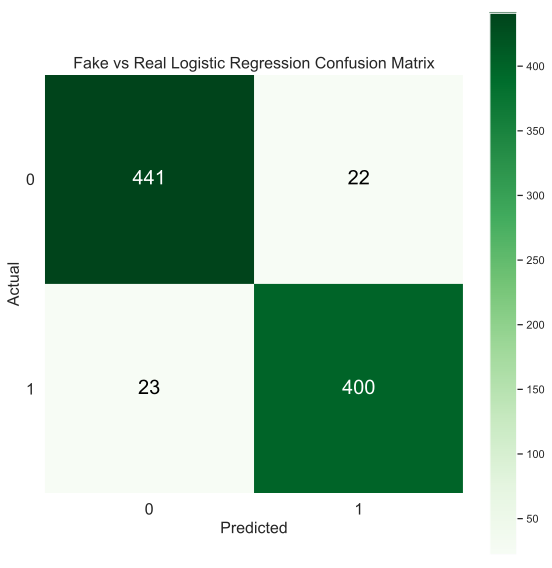

<Figure size 3600x2400 with 0 Axes>

In [43]:
#Print Normalized Confusion Matrix
gs_lr_cm = plot_confusion_matrix(y_test, lr_predicted, file_name='Loggistic_Regression_Confusion_Matrix', title='Fake vs Real Logistic Regression Confusion Matrix');
print('Logistic Regression Classifcation Report: \n ', classification_report(y_test,lr_predicted));

Logistic Regression ROC AUC score =  0.9490551394186337


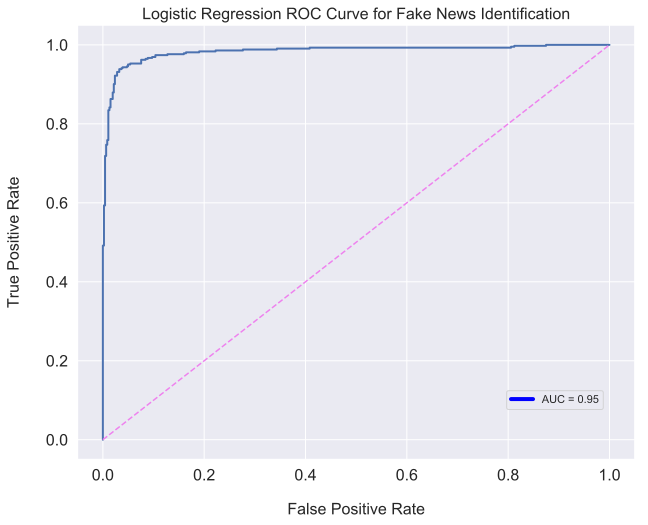

<Figure size 3600x2400 with 0 Axes>

In [44]:
#Generate ROC Curve for Naive Bayes
from matplotlib.lines import Line2D
fpr, tpr, thresholds = roc_curve(y_test, gs_lr.predict_proba(x_test)[:,1])

fig, ax = plt.subplots(figsize=(10, 8))
plt.figure(dpi=600)

ax.plot(fpr, tpr,lw=2)
ax.plot([0,1],[0,1],c='violet',ls='--')
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])

ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('Logistic Regression ROC Curve for Fake News Identification',fontsize=16)
custom_lines = [Line2D([0], [0], color='blue', lw=4)]
ax.legend(custom_lines, ['AUC = {:.2f}'.format(roc_auc_score(y_test,lr_predicted))], loc=(.77,.115))

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5,-0.1)
print(f"\033[1m\033[94mLogistic Regression ROC AUC score = ", roc_auc_score(y_test, lr_predicted))

fig.savefig('./graphs/Logistic_Regression_ROC_Curve.png', dpi=600)

In [45]:
#Save Model
filename = './models/logistic_regression/logistic_regression.sav'
pickle.dump(gs_lr, open(filename, 'wb'))

filename = './models/logistic_regression/ypred_logistic_regression.sav'
pickle.dump(lr_predicted, open(filename, 'wb'))

### Random Forest

In [46]:
def Random_Forest_Classifier(X_train, y_train,n_estimators,criterion,max_features,min_samples_leaf):
    # Reassign original training data to upsampled data
    X_train_re, y_train_re = np.copy(X_train), np.copy(y_train)

    # Refit RF classifier using best params
    clf_rf = make_pipeline(TfidfVectorizer(max_df=0.80, min_df=0.001),
                           RandomForestClassifier(n_estimators=n_estimators,
                                                  criterion=criterion,
                                                  max_features=max_features,
                                                  min_samples_leaf=min_samples_leaf,
                                                  class_weight="balanced",
                                                  n_jobs=-1,
                                                  random_state=123))
    clf_rf.fit(X_train_re, y_train_re)
        
    return clf_rf

In [48]:
n_estimators =300
criterion = 'gini'
max_features = 'sqrt'
min_samples_leaf = 1

#Run RandomForest Classifier On Training Data Per Our Tuned Hyperparameters
gs_rf = Random_Forest_Classifier(x_train, y_train, n_estimators,criterion,max_features,min_samples_leaf)

#Save Model
filename = './models/random_forest/random_forest.sav'
pickle.dump(gs_rf, open(filename, 'wb'))

rf_predicted = gs_rf.predict(x_test)
filename = './models/random_forest/ypred_random_forest.sav'
pickle.dump(rf_predicted, open(filename, 'wb'))


Confusion matrix, without normalization
Random Forest Classifcation Report: 
                precision    recall  f1-score   support

           0       0.94      0.91      0.92       463
           1       0.90      0.93      0.92       423

    accuracy                           0.92       886
   macro avg       0.92      0.92      0.92       886
weighted avg       0.92      0.92      0.92       886



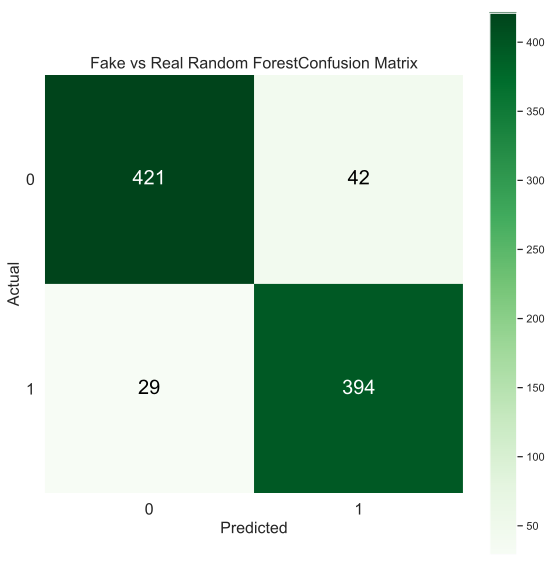

<Figure size 3600x2400 with 0 Axes>

In [49]:
#Print Normalized Confusion Matrix
gs_rf_cm = plot_confusion_matrix(y_test, rf_predicted, file_name='Random_Forest_Confusion_Matrix', title='Fake vs Real Random ForestConfusion Matrix');
print('Random Forest Classifcation Report: \n ', classification_report(y_test, rf_predicted));

Random Forest ROC AUC score =  0.9203646686988445


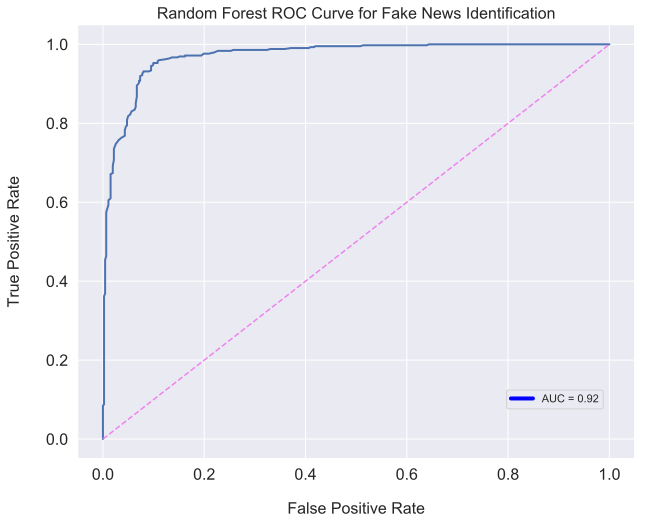

<Figure size 3600x2400 with 0 Axes>

In [50]:
#Generate ROC Curve for Random Forest
from matplotlib.lines import Line2D
fpr, tpr, thresholds = roc_curve(y_test, gs_rf.predict_proba(x_test)[:,1])

fig, ax = plt.subplots(figsize=(10, 8))
plt.figure(dpi=600)

ax.plot(fpr, tpr,lw=2)
ax.plot([0,1],[0,1],c='violet',ls='--')
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])

ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('Random Forest ROC Curve for Fake News Identification',fontsize=16)
custom_lines = [Line2D([0], [0], color='blue', lw=4)]
ax.legend(custom_lines, ['AUC = {:.2f}'.format(roc_auc_score(y_test,rf_predicted))], loc=(.77,.115))

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5,-0.1)
print(f"\033[1m\033[94mRandom Forest ROC AUC score = ", roc_auc_score(y_test, rf_predicted))

fig.savefig('./graphs/Random_Forest_ROC_Curve.png', dpi=600)

### SVM

In [51]:
text_pipe_svm = Pipeline([('tfidf',TfidfVectorizer(max_df=0.75, min_df=0.001)),
                         ('svm',SVC(C=0.01, gamma=0.1,class_weight='balanced',kernel="poly", degree=5,coef0=10, probability=True))])

gs_svm = text_pipe_svm.fit(x_train, y_train)

svc_cv_scores = cross_val_score(gs_svm,
                                X=x_train,
                                y=y_train,
                                scoring="precision",
                                cv=5,
                                n_jobs=-1)

# Print CV
print("\033[1m" + "\033[94m" + "The 5-folds CV f1-score is: {:.2f}%".format(
       np.mean(svc_cv_scores) * 100))

#Predict Y using Model
svm_predicted = gs_svm.predict(x_test)

#Save Model
filename = './models/svm/svm_cv.sav'
pickle.dump(gs_svm, open(filename, 'wb'))

filename = './models/svm/ypred_svm_cv.sav'
pickle.dump(svm_predicted, open(filename, 'wb'))

The 5-folds CV f1-score is: 87.94%


Confusion matrix, without normalization
SVM Classifcation Report: 
                precision    recall  f1-score   support

           0       0.95      0.90      0.92       463
           1       0.90      0.95      0.92       423

    accuracy                           0.92       886
   macro avg       0.92      0.92      0.92       886
weighted avg       0.92      0.92      0.92       886



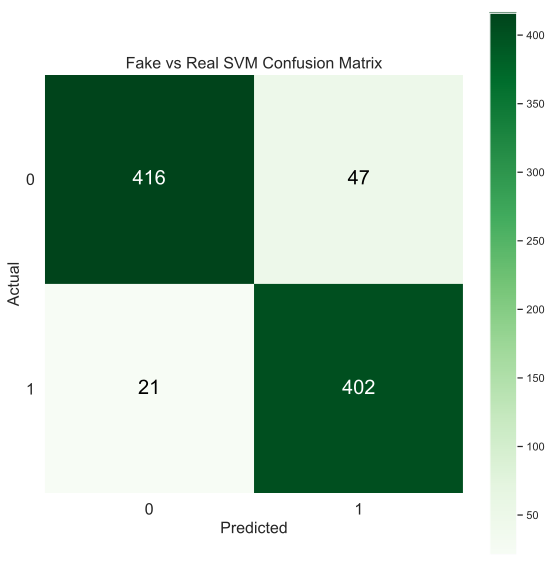

<Figure size 3600x2400 with 0 Axes>

In [52]:
#Print Normalized Confusion Matrix
gs_svm_cm = plot_confusion_matrix(y_test, svm_predicted, file_name='SVM_Confusion_Matrix', title='Fake vs Real SVM Confusion Matrix');
print('SVM Classifcation Report: \n ', classification_report(y_test,svm_predicted));

SVM ROC AUC score =  0.924421365439701


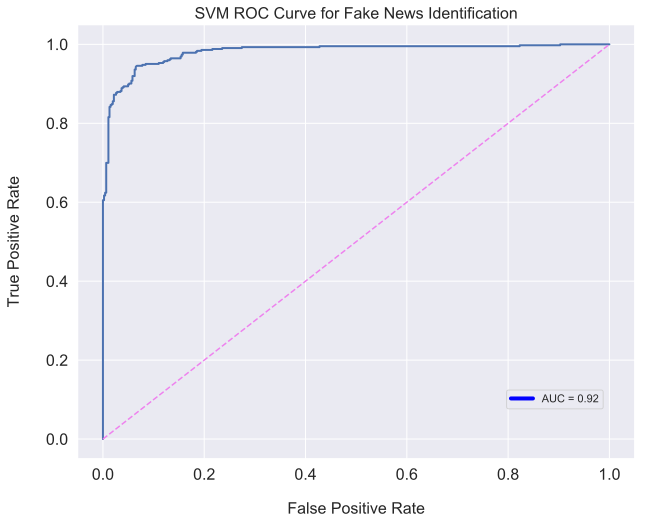

<Figure size 3600x2400 with 0 Axes>

In [53]:
#Generate ROC Curve for Naive Bayes
from matplotlib.lines import Line2D
fpr, tpr, thresholds = roc_curve(y_test, gs_svm.predict_proba(x_test)[:,1])

fig, ax = plt.subplots(figsize=(10, 8))
plt.figure(dpi=600)

ax.plot(fpr, tpr,lw=2)
ax.plot([0,1],[0,1],c='violet',ls='--')
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])

ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('SVM ROC Curve for Fake News Identification',fontsize=16)
custom_lines = [Line2D([0], [0], color='blue', lw=4)]
ax.legend(custom_lines, ['AUC = {:.2f}'.format(roc_auc_score(y_test,svm_predicted))], loc=(.77,.115))

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5,-0.1)
print(f"\033[1m\033[94mSVM ROC AUC score = ", roc_auc_score(y_test, svm_predicted))

fig.savefig('./graphs/SVM_ROC_Curve.png', dpi=600)

# Plot ROC Curves on Single Plot


In [54]:
#Load models
gs_rf = pickle.load(open('./models/random_forest/random_forest.sav', 'rb'))
gs_lr = pickle.load(open('./models/logistic_regression/logistic_regression.sav', 'rb'))
gs_svm = pickle.load(open('./models/svm/svm_cv.sav', 'rb'))
gs_nb = pickle.load(open('./models/naive_bayes/naive_bayes.sav', 'rb'))

The accuracy rate and f1-score on test data are:
RF: 91.99%, 91.73%.
LR: 94.92%, 94.67%.
SVC: 92.33%, 92.20%.
NB: 93.12%, 92.75%.


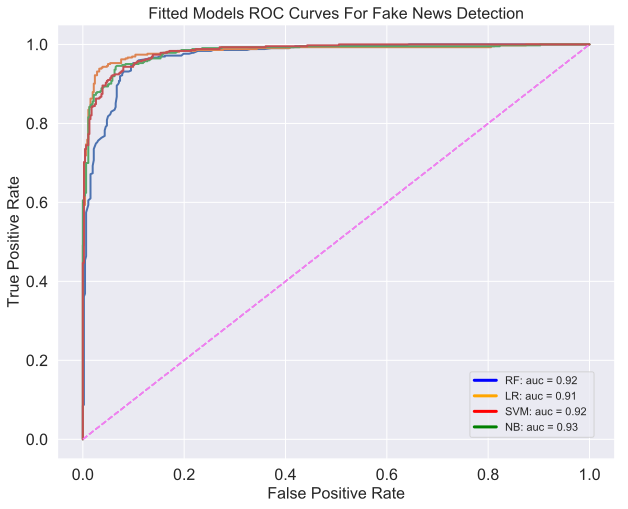

In [55]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

titles = ['RF','LR','SVC','NB']
# fitted_models = [clf_rf, gs_logmodel, clf_svc, gs_gb, gs_knn]
estimators = {"RF": gs_rf ,
              "LR": gs_lr,
              "SVC": gs_svm,
              "NB": gs_nb}
plt.figure(figsize=(10, 8),dpi=600)

colors = ['blue','orange','red','green','purple']
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['RF: auc = 0.92','LR: auc = 0.91','SVM: auc = 0.92 ','NB: auc = 0.93 ']
plt.legend(lines, labels, loc=(.74,.05))

print("The accuracy rate and f1-score on test data are:")
for estimator in estimators.keys():
    print("{}: {:.2f}%, {:.2f}%.".format(estimator,
            accuracy_score(y_test, estimators[estimator].predict(x_test)) * 100,
            f1_score(y_test, estimators[estimator].predict(x_test)) * 100))
        
    fpr, tpr, thresholds = roc_curve(y_test, estimators[estimator].predict_proba(x_test)[:,1])
    
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],c='violet',ls='--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    
    plt.xlabel('False Positive Rate', fontsize=16,)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Fitted Models ROC Curves For Fake News Detection',fontsize=16);
    plt.tick_params(labelsize=16)
    
plt.savefig('./graphs/fitted_models_roc_curve.png', dpi=600)